In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from wordcloud import WordCloud


Instancio los dataframes

In [ ]:
data_items = pd.read_parquet('C:\\Users\\Alañ\\Documents\\Henry\\Proyecto 1\\Proyecto-Individual-1\\Data_Limpia\\items_combinados.parquet')
data_juegos = pd.read_parquet('C:\\Users\\Alañ\\Documents\\Henry\\Proyecto 1\\Proyecto-Individual-1\\Data_Limpia\\juegos_steam.parquet')
data_review = pd.read_parquet('C:\\Users\\Alañ\\Documents\\Henry\\Proyecto 1\\Proyecto-Individual-1\\Data_Limpia\\nuevo_reviews_limpio.parquet')

Hago una Visualizacion de las descripciones de los dataframes

In [ ]:
data_juegos.describe(include='all') 

In [ ]:
data_review.describe(include='all') 

EDA GAMES
==

In [ ]:
# Crear un nuevo dataframe 'juegos_eda' con las mismas columnas que 'items'
juegos_eda = data_juegos.rename(columns={'id':'item_id'}).drop(columns=['Unnamed: 0'])
juegos_eda['release_date'] = juegos_eda['release_date'][0:4]

# Calcular la cantidad de ventas de cada item
ventas_por_item = data_items['item_id'].value_counts().reset_index()
ventas_por_item.columns = ['item_id', 'cantidad_ventas']

# Fusionar el dataframe 'ventas_por_item' con 'juegos_eda' basado en 'item_id'
juegos_eda = pd.merge(juegos_eda, ventas_por_item, on='item_id', how='left')

# Calcular el total de ventas multiplicando la cantidad de ventas por el precio
total_ventas = []
for i in range(0, len(juegos_eda)):
    if 'Free' in str(juegos_eda.loc[i, 'price']) or str(juegos_eda.loc[i, 'price']) == ' ' or 'Install Now':
        total_ventas.append(float(0))
    else:
        total_ventas.append(float(juegos_eda.loc[i,'cantidad_ventas']) * float(juegos_eda.loc[i, 'price']))
juegos_eda['total_ventas'] = total_ventas

# Mostrar el nuevo dataframe 'juegos_eda' con las columnas añadidas
juegos_eda

Las cantidad de ventas por genero

In [ ]:
juegos_eda_genres = juegos_eda.copy()

# Primero, agrupa el dataframe 'nuevo_items' por género y suma las cantidades de ventas y las ventas totales

juegos_eda_genres = juegos_eda_genres.groupby('genres').agg({'cantidad_ventas': 'sum', 'total_ventas': 'sum'}).reset_index()

# Mostrar el nuevo dataframe 'ventas_por_genero' con las sumas por género

juegos_eda_genres

Mostramos los generos más vendidos


In [ ]:
juegos_eda_genres = juegos_eda_genres.sort_values(by='total_ventas', ascending=False)

juegos_eda_genres

Relacion genero venta

In [ ]:
Frecuecia_xgenero = juegos_eda_genres['genres']
Frecuecia_xgenero = pd.concat([juegos_eda_genres[['cantidad_ventas']], Frecuecia_xgenero], axis=1)
Frecuecia_xgenero


funcion para extrar los generos y ventas dado que las mismas se encuentran en formato de lista

In [ ]:

generos_dict = {}


# Función para separar los géneros y agregarlos al diccionario si no están agregados anteriormente
def agregar_generos(cantidad_ventas, generos_str):
    # Remover los corchetes y comillas
    generos_str = generos_str.strip("[]").replace("'", "")
    # Separar los géneros por coma
    generos = generos_str.split(", ")
    # Agregar los géneros al diccionario junto con la cantidad de ventas si no están ya presentes
    for genero in generos:
        if genero not in generos_dict:
            generos_dict[genero] = cantidad_ventas
        else:
            generos_dict[genero] += cantidad_ventas

# Aplicar la función a la columna 'genres'
juegos_eda_genres.apply(lambda row: agregar_generos(row['cantidad_ventas'], row['genres']), axis=1)

# Mostrar el diccionario resultante
print(generos_dict)

In [ ]:
general_generos = pd.DataFrame(list(generos_dict.items()), columns=['Genero', 'Cantidad_ventas'])


In [ ]:
genero_cantidad_ventas = dict(zip(general_generos['Genero'], general_generos['Cantidad_ventas']))
# Crear la wordcloud con los datos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genero_cantidad_ventas)

# Mostrar la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('frecuencia género y ventas')
plt.show()

### Visualizacion de mejores desarrolladoras

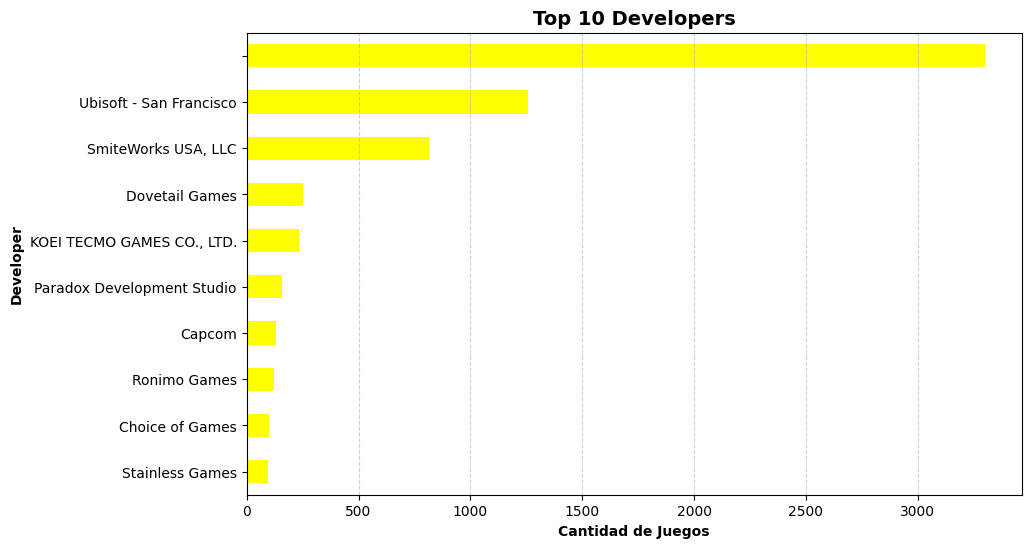

In [58]:
# Contamos la cantidad de juegos por developer
conteo_developer = data_juegos['developer'].value_counts()

# Creamos una figura solo con un subplot para los developers
plt.figure(figsize=(10, 6))

# Plot para los developers
conteo_developer[:10].sort_values().plot(kind='barh', color='yellow')  # Usar plot horizontal para facilitar la lectura
plt.title('Top 10 Developers', fontsize=14, weight='bold')
plt.xlabel('Cantidad de Juegos', weight='bold')
plt.ylabel('Developer', weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Agregar líneas de cuadrícula para referencia

# Mostramos el gráfico
plt.show()

EDA REVIEWS
==

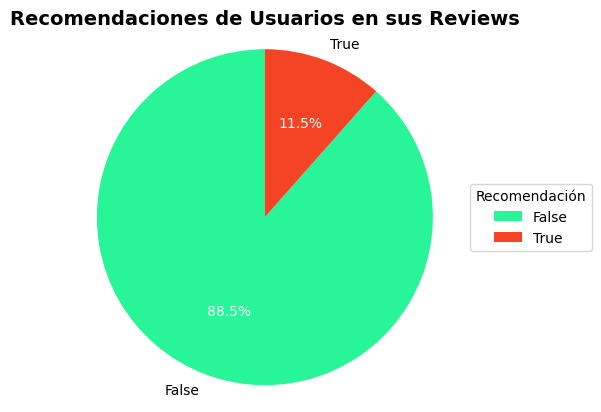

In [64]:
# Agrupamos los valores y ordenamos de menor a mayor
cant_recommend = data_review['recommend'].groupby(data_review['recommend']).count()
recommend = data_review['recommend'].unique()
colores = ["#27F597", "#F54326"]  # Cambié los colores para mejorar el contraste
sorted_cant_recommend, sorted_recommend = zip(*sorted(zip(cant_recommend, recommend), reverse=True))

# Creamos el gráfico de pie
fig, piechart_3 = plt.subplots()
wedges, _, autopcts = piechart_3.pie(sorted_cant_recommend, labels=sorted_recommend, autopct='%1.1f%%', colors=colores, startangle=90, textprops={'color': 'black'}, pctdistance=0.6, labeldistance=1.1)

# Cambiamos el color del porcentaje para que sea más legible
for autopct in autopcts:
    autopct.set_color('white')

# Añadimos leyenda
piechart_3.legend(wedges, sorted_recommend, title="Recomendación", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

# Ajustamos el aspecto del gráfico, para que el gráfico de pie sea circular y no se deforme
piechart_3.axis('equal')

# Agregamos título
piechart_3.set_title('Recomendaciones de Usuarios en sus Reviews', color='black', fontsize=14, weight='bold')

# Mostramos el gráfico
plt.show()